# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [45]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.4 MB/s eta 0:00:00


In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from skopt import BayesSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
clustered_df = pd.read_csv('/content/result_clustered.csv')
clustered_df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Cluster
0,0,-1.181818,4,2,3.641841,1.758649,1.573918,2.433882,4.276830,-0.309260,1
1,1,-1.181818,1,2,-0.151327,-0.373791,1.573918,-0.253612,-0.076177,-0.422502,0
2,8,-1.181818,1,2,-0.481141,-0.564929,1.573918,-0.487288,-0.454668,-1.046675,0
3,9,-1.181818,4,2,0.583794,0.000000,1.573918,0.267228,0.767442,0.000000,0
4,11,-1.181818,1,2,-0.427894,-0.533284,1.573918,-0.449563,-0.393562,-0.805288,0


Menampilkan informasi umum tentang dataset.

In [3]:
clustered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  int64  
 1   Crop_Year        19689 non-null  float64
 2   Season           19689 non-null  int64  
 3   State            19689 non-null  int64  
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  float64
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
 10  Cluster          19689 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 1.7 MB


Fitur Cluster dalam dataset adalah Label target yang berisi hasil clustering. Fitur ini merupakan variabel yang ingin diprediksi dalam model klasifikasi.

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [16]:
clustered = clustered_df.copy()
# Tentukan kolom mana yang akan di-robust scaling
cols_scale = ['Crop', 'Season', 'State', 'Cluster']

# Inisialisasi RobustScaler
scaler = RobustScaler()

# Terapkan RobustScaler hanya pada kolom yang dipilih
clustered[cols_scale] = scaler.fit_transform(clustered[cols_scale])

# Pisahkan fitur (X) dan target (y)
X = clustered.drop(columns=['Cluster'])
y = clustered['Cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(15751, 10), y_train=(15751,)
Test set shape: X_test=(3938, 10), y_test=(3938,)


In [17]:
clustered.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Cluster
0,-1.192308,-1.181818,1.0,-0.8,3.641841,1.758649,1.573918,2.433882,4.276830,-0.309260,1.0
1,-1.153846,-1.181818,-0.5,-0.8,-0.151327,-0.373791,1.573918,-0.253612,-0.076177,-0.422502,0.0
2,-0.884615,-1.181818,-0.5,-0.8,-0.481141,-0.564929,1.573918,-0.487288,-0.454668,-1.046675,0.0
3,-0.846154,-1.181818,1.0,-0.8,0.583794,0.000000,1.573918,0.267228,0.767442,0.000000,0.0
4,-0.769231,-1.181818,-0.5,-0.8,-0.427894,-0.533284,1.573918,-0.449563,-0.393562,-0.805288,0.0


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [18]:
# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [19]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    results = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1-Score': f1_score(y_test, y_pred, average='macro')
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.992636   0.989050  0.980579  0.984747
1            Decision Tree (DT)  0.994159   0.988142  0.982209  0.985102
2            Random Forest (RF)  0.996191   0.991641  0.987254  0.989386
3  Support Vector Machine (SVM)  0.996953   0.995584  0.991289  0.993409
4              Naive Bayes (NB)  0.945658   0.856599  0.940845  0.893285


### **Hasil dari evaluasi berbagai model klasifikasi**

#### **Hasil Confusion Matrix Algoritma KNN**

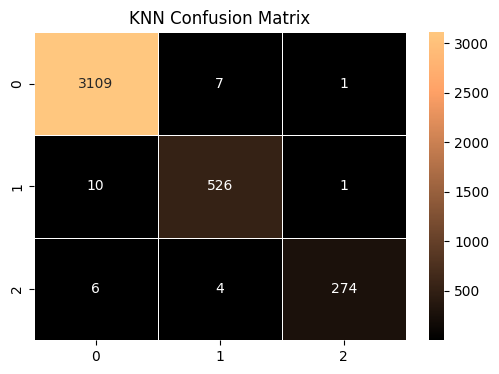

In [30]:
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Heatmap Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, cmap='copper', fmt='d', linewidths=0.5)
plt.title('KNN Confusion Matrix')
plt.show()

* Cluster 0: ada 3109 yang benar diprediksi sebagai Cluster 0, ada 7 yang salah diprediksi sebagai Cluster 1, dan ada 1 yang salah diprediksi sebagai Cluster 2.
* Cluster 1: ada 526 yang benar diprediksi sebagai Cluster 1, ada 10 yang salah diprediksi sebagai Cluster 0, dan ada 1 yang salah prediksi sebagai Cluster 2.
* Cluster 2: ada 274 yang benar diprediksi sebagai Cluster 2, ada 18 yang salah diprediksi sebagai Cluster 0, dan ada 18 yang salah diprediksi sebagai Cluster 1.

#### **Hasil Confusion Matrix Algoritma Decision Tree**

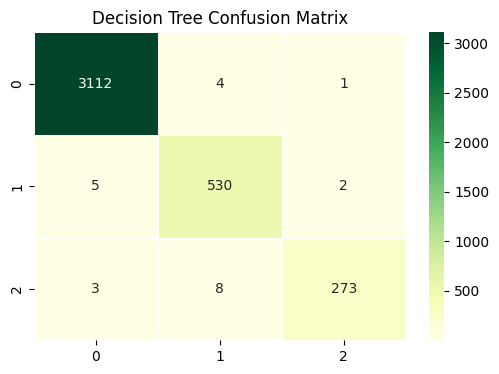

In [31]:
y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Heatmap Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, cmap='YlGn', fmt='d', linewidths=0.5)
plt.title('Decision Tree Confusion Matrix')
plt.show()

* Cluster 0: ada 3112 yang benar diprediksi sebagai Cluster 0, ada 4 yang salah diprediksi sebagai Cluster 1, dan ada 1 yang salah diprediksi sebagai Cluster 2.
* Cluster 1: ada 530 yang benar diprediksi sebagai Cluster 1, ada 5 yang salah diprediksi sebagai Cluster 0, dan ada 2 yang salah prediksi sebagai Cluster 2.
* Cluster 2: ada 273 yang benar diprediksi sebagai Cluster 2, ada 3 yang salah diprediksi sebagai Cluster 0, dan ada 8 yang salah diprediksi sebagai Cluster 1.

#### **Hasil Confusion Matrix Algoritma Random Forest**

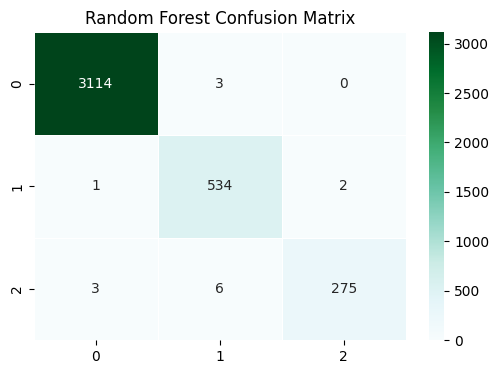

In [33]:
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Heatmap Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, cmap='BuGn', fmt='d', linewidths=0.5)
plt.title('Random Forest Confusion Matrix')
plt.show()

* Cluster 0: ada 3114 yang benar diprediksi sebagai Cluster 0, ada 3 yang salah diprediksi sebagai Cluster 1, dan ada 0 yang salah diprediksi sebagai Cluster 2.
* Cluster 1: ada 534 yang benar diprediksi sebagai Cluster 1, ada 1 yang salah diprediksi sebagai Cluster 0, dan ada 2 yang salah prediksi sebagai Cluster 2.
* Cluster 2: ada 275 yang benar diprediksi sebagai Cluster 2, ada 3 yang salah diprediksi sebagai Cluster 0, dan ada 6 yang salah diprediksi sebagai Cluster 1.

#### **Hasil Confusion Matrix Algoritma SVM**

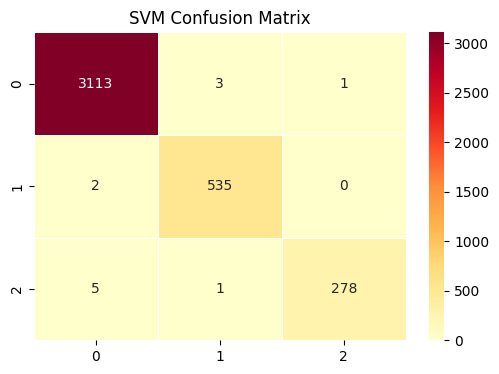

In [36]:
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Heatmap Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, cmap='YlOrRd', fmt='d', linewidths=0.5)
plt.title('SVM Confusion Matrix')
plt.show()

* Cluster 0: ada 3113 yang benar diprediksi sebagai Cluster 0, ada 3 yang salah diprediksi sebagai Cluster 1, dan ada 1 yang salah diprediksi sebagai Cluster 2.
* Cluster 1: ada 535 yang benar diprediksi sebagai Cluster 1, ada 2 yang salah diprediksi sebagai Cluster 0, dan ada 0 yang salah prediksi sebagai Cluster 2.
* Cluster 2: ada 278 yang benar diprediksi sebagai Cluster 2, ada 5 yang salah diprediksi sebagai Cluster 0, dan ada 1 yang salah diprediksi sebagai Cluster 1.

#### **Hasil Confusion Matrix Algoritma Naive Bayes**

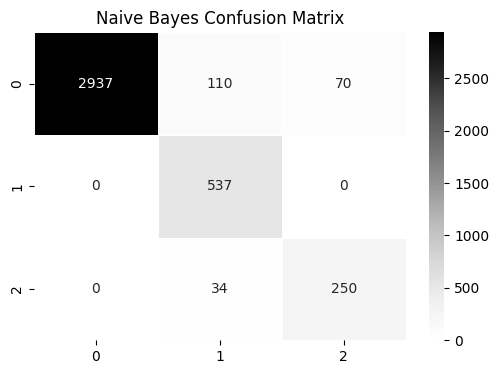

In [42]:
y_pred_nb = nb.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Heatmap Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, cmap='Greys', fmt='d', linewidths=0.5)
plt.title('Naive Bayes Confusion Matrix')
plt.show()

* Cluster 0: ada 2937 yang benar diprediksi sebagai Cluster 0, ada 110 yang salah diprediksi sebagai Cluster 1, dan ada 70 yang salah diprediksi sebagai Cluster 2.
* Cluster 1: ada 537 yang benar diprediksi sebagai Cluster 0, ada 0 yang salah diprediksii sebagai Cluster 0, dan ada 0 yang salah prediksi sebagai Cluster 2.
* Cluster 2: ada 250 yang benar diprediksi sebagai Cluster 2, ada 0 yang salah diprediksi sebagai Cluster 0, dan ada 34 yang salah diprediksi sebagai Cluster 1.

### **Rangkuman Hasil**

Berikut adalah ringkasan hasil evaluasi untuk masing-masing model klasifikas

In [47]:
summary_df

,Model,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbors (KNN),0.992636,0.989050,0.980579,0.984747
1,Decision Tree (DT),0.994159,0.988142,0.982209,0.985102
2,Random Forest (RF),0.996191,0.991641,0.987254,0.989386
3,Support Vector Machine (SVM),0.996953,0.995584,0.991289,0.993409
4,Naive Bayes (NB),0.945658,0.856599,0.940845,0.893285


* **K-Nearest Neighbors (KNN)** menunjukkan akurasi sebesar 99.26%. Model ini memiliki precision 98.90%, recall 98.05%, dan F1-Score 98.47%. Semuanya memiliki angka yang sangat tinggi menunjukkan bahwa ketika model mengklasifikasikan ke suatu cluster, kemungkinan besar prediksi tersebut benar.

* **Decision Tree** memperoleh akurasi sebesar 99.41%. Precision-nya adalah 98.81%, recall 98.22%, dan F1-Score 98.51%. Semuanya memiliki angka yang sangat tinggi menunjukkan bahwa ketika model mengklasifikasikan ke suatu cluster, kemungkinan besar prediksi tersebut benar.

* **Random Forest** tampil dengan akurasi tertinggi sebesar 99.61%. Model ini memiliki precision 99.16%, recall 98.72%, dan F1-Score 98.93%. Semuanya memiliki angka yang sangat tinggi menunjukkan bahwa ketika model mengklasifikasikan ke suatu cluster, kemungkinan besar prediksi tersebut benar.

* **Support Vector Machine (SVM)** memiliki akurasi 99.69%. Precision-nya mencapai 99.55%, recall 99.12%, dan F1-Score 99.34%. Semuanya memiliki angka yang sangat tinggi menunjukkan bahwa ketika model mengklasifikasikan ke suatu cluster, kemungkinan besar prediksi tersebut benar.

* **Naive Bayes** menunjukkan akurasi 94.56%. Precision-nya adalah 85.65%, recall 94.08%, dan F1-Score 89.32%. Meskipun precision-nya dan F1-Score memiliki angka yang relatif tinggi, tetapi diantara model lainnya angka tersebut paling rendah.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [49]:
# Definisikan ruang pencarian untuk Bayesian Optimization
param_space = {
    'n_estimators': (100, 500),
    'max_depth': (10, 20),
    'min_samples_split': (2, 10),
    'criterion': ['gini', 'entropy']
}

# Inisialisasi BayesSearchCV
bayes_search = BayesSearchCV(estimator=rf, search_spaces=param_space, n_iter=32, cv=3, n_jobs=-1, verbose=2, random_state=42)
bayes_search.fit(X_train, y_train)

# Output hasil terbaik
print(f"Best parameters (Bayesian Optimization): {bayes_search.best_params_}")
best_rf_bayes = bayes_search.best_estimator_

# Evaluasi performa model pada test set
bayes_search_score = best_rf_bayes.score(X_test, y_test)
print(f"Accuracy after Bayesian Optimization: {bayes_search_score:.2f}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [79]:
# Prediksi dengan model terbaik
y_pred_bs = best_rf_bayes.predict(X_test)

# Menghitung dan menampilkan metrik evaluasi
metrics = []
metrics.append({
    'Accuracy': round(accuracy_score(y_test, y_pred_bs), 6),
    'Precision': round(precision_score(y_test, y_pred_bs, average='macro'), 6),
    'Recall': round(recall_score(y_test, y_pred_bs, average='macro'), 6),
    'F1-Score': round(f1_score(y_test, y_pred_bs, average='macro'), 6)
})

print(pd.DataFrame(metrics))

   Accuracy  Precision    Recall  F1-Score
0  0.997207   0.993603  0.991948  0.992764


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**Bandingkan hasil evaluasi sebelum dan setelah tuning**

In [80]:
print("Hasil evaluasi sebelum tuning")
sum_rf = summary_df[summary_df['Model'] == 'Random Forest (RF)'].iloc[:, [1, 2, 3, 4]].values
print(pd.DataFrame(sum_rf, columns=['Accuracy', 'Precision', 'Recall', 'F1-Score']))

print()

print("Hasil evaluasi sebelum dan setelah tuning")
print(pd.DataFrame(metrics))

Hasil evaluasi sebelum tuning
   Accuracy  Precision    Recall  F1-Score
0  0.996191   0.991641  0.987254  0.989386

Hasil evaluasi sebelum dan setelah tuning
   Accuracy  Precision    Recall  F1-Score
0  0.997207   0.993603  0.991948  0.992764


**Perbandingan Sebelum dan Setelah Tuning**
1. **Accuracy**
  * Sebelum Tuning: 0.996191
  * Setelah Tuning: 0.997207

  **Analisis:**

  Terjadi sedikit peningkatan pada Accuracy setelah tuning (dari 0.996191 menjadi 0.9972).

2. **Precision**
  * Sebelum Tuning: 0.991641
  * Setelah Tuning: 0.993603

  **Analisis:**

  Precision meningkat setelah tuning, yang berarti model efektif dalam mengklasifikasikan prediksi cluster yang sebenarnya.

3. **Recall**
  * Sebelum Tuning: 0.987254
  * Setelah Tuning: 0.991948

  **Analisis:**

  Recall juga meningkat sedikit setelah tuning, yang menunjukkan bahwa model lebih baik dalam mengidentifikasi suatu instance.

4. **F1-Score**
  * Sebelum Tuning: 0.989386
  * Setelah Tuning: 0.992864

  **Analisis:**

  F1-Score meningkat dari 0.989386 menjadi 0.9928 setelah tuning. Peningkatan F1-Score menunjukkan bahwa secara keseluruhan model menjadi lebih baik dalam keseimbangan antara Precision dan Recall.

**Identifikasi kelemahan model**

Meskipun model menunjukkan peningkatan setelah tuning, ada beberapa aspek yang perlu diperhatikan:

**Precision atau Recall untuk Kelas Tertentu:**

* Perbedaan antara Precision dan Recall yang relatif kecil menunjukkan bahwa model sudah cukup baik dalam menangani proses klasifikasi suatu cluster.

**Kemungkinan Overfitting atau Underfitting:**

* Overfitting: Model menunjukkan Accuracy tinggi (sebelum dan sesudah tuning), namun performa yang sangat tinggi pada data pelatihan dapat menandakan kemungkinan overfitting.

* Underfitting: Tidak terlihat adanya indikasi underfitting karena Accuracy, Precision, Recall, dan F1-Score sudah cukup baik di kedua pengujian.